In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Aggregation

In [2]:
df = pd.read_csv("http://bit.ly/drinksbycountry")

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
df.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [6]:
df.groupby('continent').beer_servings.agg(['mean','sum','count'])

,mean,sum,count
continent,,,
Africa,61.471698,3258,53
Asia,37.045455,1630,44
Europe,193.777778,8720,45
North America,145.434783,3345,23
Oceania,89.687500,1435,16
South America,175.083333,2101,12


## Last

In [13]:
df2 = pd.DataFrame({'patient':[101,102,103,101,102],
                   'visit':[2014,2014,2015,2013,2015]})
df2 = df2.sort_values('visit')

In [14]:
df2.groupby('patient').visit.last()

patient
101    2014
102    2015
103    2015
Name: visit, dtype: int64

## Named aggregation

In [15]:
df.groupby('continent').wine_servings.agg(wine_mean ='mean',
                                          wine_sum = 'sum',
                                          wine_count = 'count')

,wine_mean,wine_sum,wine_count
continent,,,
Africa,16.264151,862,53
Asia,9.068182,399,44
Europe,142.222222,6400,45
North America,24.521739,564,23
Oceania,35.625000,570,16
South America,62.416667,749,12


In [16]:
df.groupby('continent').agg(wine_mean =('wine_servings','mean'),
                            wine_sum = ('wine_servings','sum'),
                            beer_mean = ('beer_servings','mean'),
                            spirit_mean = ('spirit_servings','mean'))

,wine_mean,wine_sum,beer_mean,spirit_mean
continent,,,,
Africa,16.264151,862,61.471698,16.339623
Asia,9.068182,399,37.045455,60.840909
Europe,142.222222,6400,193.777778,132.555556
North America,24.521739,564,145.434783,165.739130
Oceania,35.625000,570,89.687500,58.437500
South America,62.416667,749,175.083333,114.750000


## Combine the agg function output with original dataframe

In [19]:
df['wine_mean'] = df.groupby('continent').wine_servings.transform('mean')

In [20]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,wine_mean
0,Afghanistan,0,0,0,0.0,Asia,9.068182
1,Albania,89,132,54,4.9,Europe,142.222222
2,Algeria,25,0,14,0.7,Africa,16.264151
3,Andorra,245,138,312,12.4,Europe,142.222222
4,Angola,217,57,45,5.9,Africa,16.264151
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America,62.416667
189,Vietnam,111,2,1,2.0,Asia,9.068182
190,Yemen,6,0,0,0.1,Asia,9.068182
191,Zambia,32,19,4,2.5,Africa,16.264151


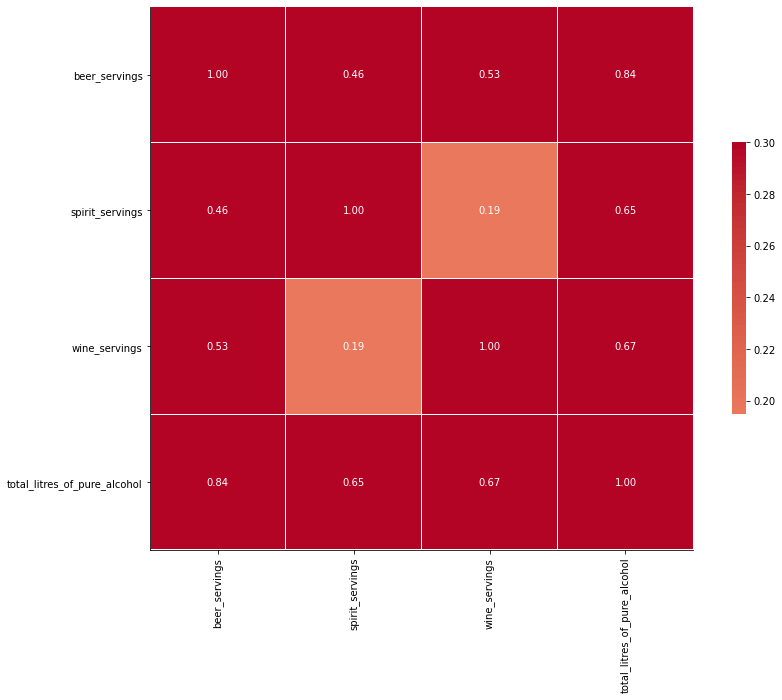

In [3]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [61]:
%reload_ext autoreload
%autoreload 2
from advanced_plotting import *

E:\Projects\ZS_Hackerrank_Feb2020\advanced_plotting.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  s_xy = conditional_entropy(x,y)


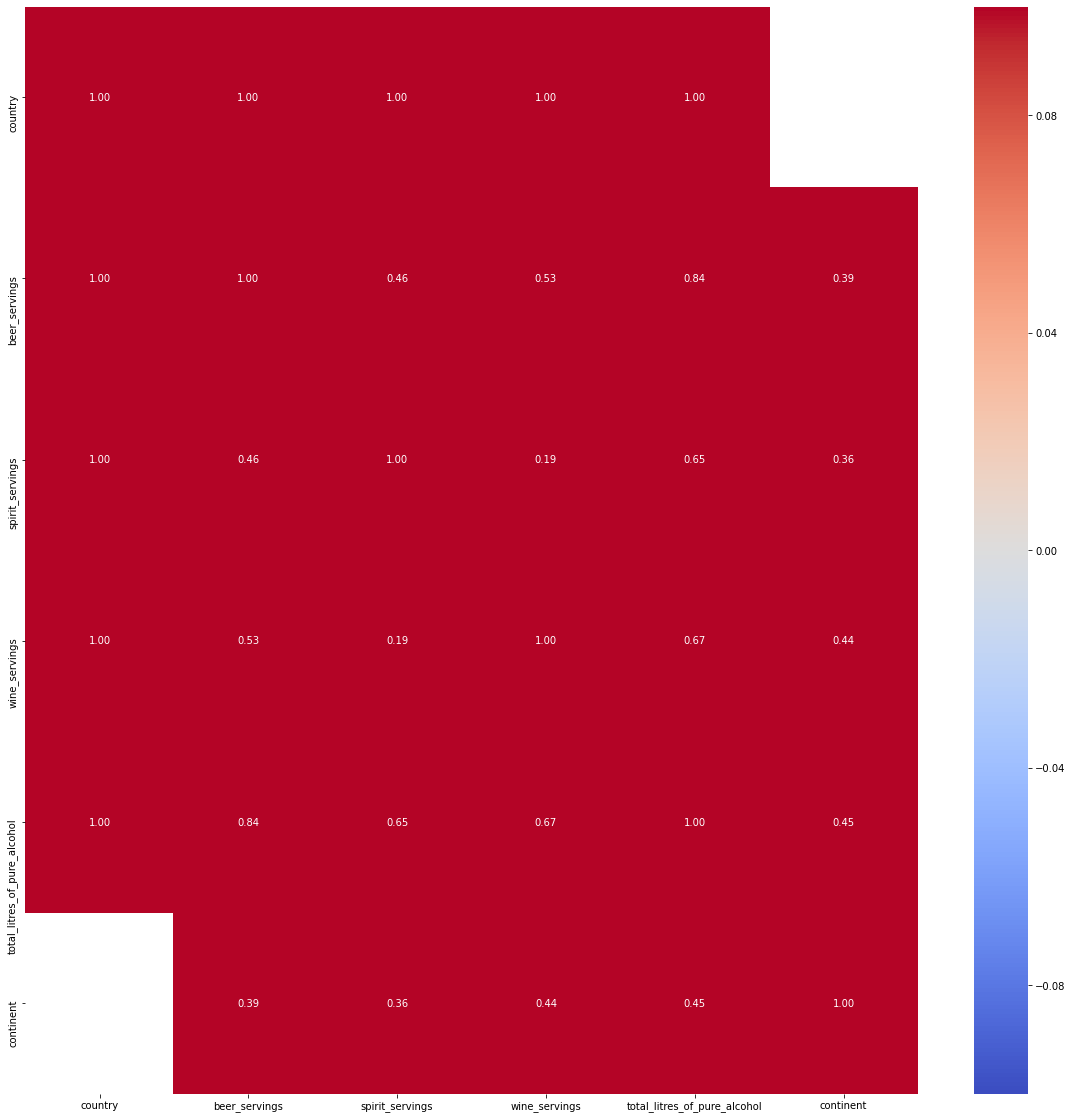

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,1.0,1.000000,1.000000,1.000000,1.000000,inf
beer_servings,1.0,1.000000,0.458819,0.527172,0.835839,0.386075
spirit_servings,1.0,0.458819,1.000000,0.194797,0.654968,0.364893
wine_servings,1.0,0.527172,0.194797,1.000000,0.667598,0.440161
total_litres_of_pure_alcohol,1.0,0.835839,0.654968,0.667598,1.000000,0.446829
continent,inf,0.386075,0.364893,0.440161,0.446829,1.000000


In [7]:
catcols = ['country','continent']
associations(df,nominal_columns=catcols,return_results=True)

## Pairplot

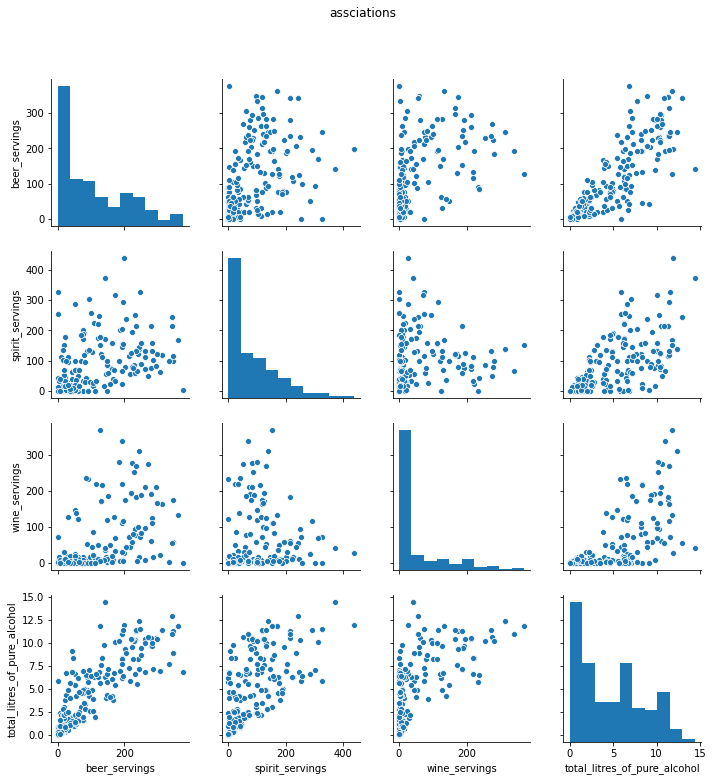

In [30]:
num_cols = ["beer_servings","spirit_servings","wine_servings","total_litres_of_pure_alcohol"]
pairplot_num(num_cols,df,"assciations")

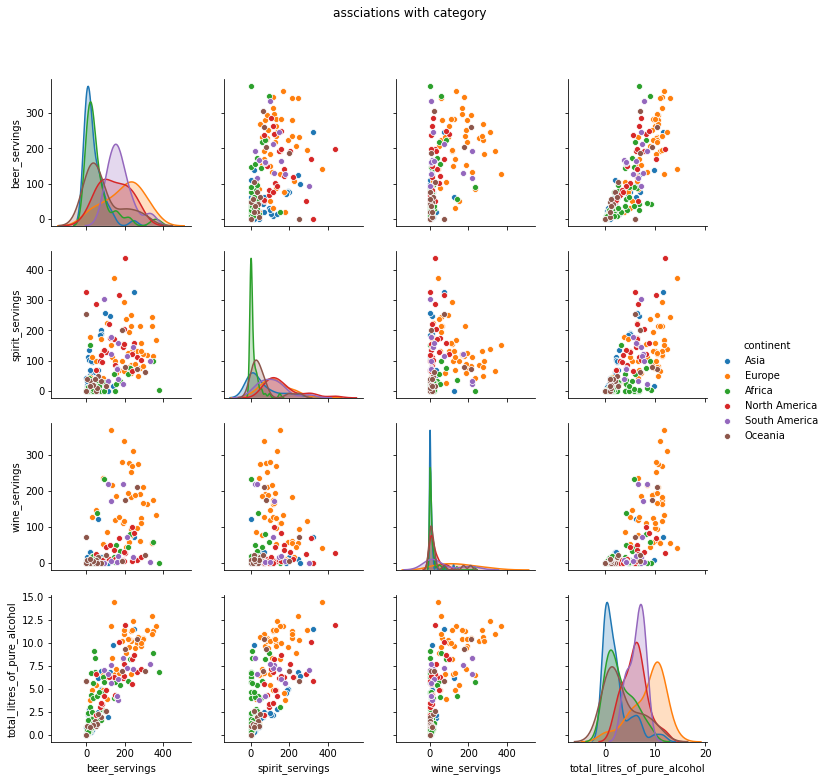

In [44]:
num_cols = ["beer_servings","spirit_servings","wine_servings","total_litres_of_pure_alcohol"]
cat_col = "continent"
pairplot_num_onecat(num_cols,cat_col,df,"assciations with category")

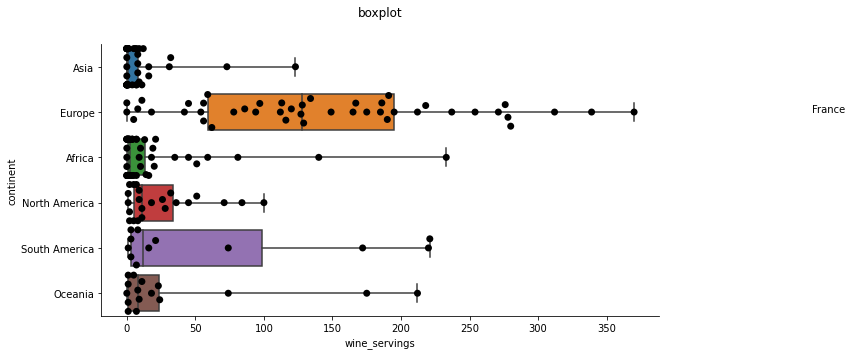

In [62]:
swarmplots_onenum_onecat('wine_servings','continent','country',df,'boxplot',5)